In [11]:
#importar paqueterías 
import pandas as pd

#from paqueteria.calculos_mineria import *
from paqueteria.mineria_05_29 import *


#Cargar tu dataset 
data = pd.read_csv('Z1P1P2_cols_limpiado_Sofi_uft_8.csv')


Metemos los datos continuos en cubetas:

In [12]:
columnas = ['G_uni_promedio', 'G_peso', 'G_estatura', 'IMC', 'G_dx_ansi_edad', 'edad', 'G_vivienda_padres_focos', 'G_ejercicios_h_preuni', 'G_ejercicios_h_uni_sincovid', 'G_ejercicios_h_uni_concovid', 'G_ejercicios_edad', 'G_fumar_cigaros_preuni', 'G_fumar_edad']
data = binnearVariosDatos (data, columnas , 3)

In [13]:
clasificados0, entrenados0, metricas0 = fitValidacionCruzada(data, 'G_comer_uni_concovid', 'Y', 0.2, 0, 'general')
clasificados2, entrenados2, metricas2 = fitValidacionCruzada(data, 'G_comer_uni_concovid', 'Y', 0.2, 2, 'general')
clasificados4, entrenados4, metricas4 = fitValidacionCruzada(data, 'G_comer_uni_concovid', 'Y', 0.2, 4, 'general')
clasificados6, entrenados6, metricas6 = fitValidacionCruzada(data, 'G_comer_uni_concovid', 'Y', 0.2, 6, 'general')

C:\Users\sofif\Documents\Proyecto Mineria\paqueteria\mineria_05_29.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[j][c]=valor
C:\Users\sofif\Documents\Proyecto Mineria\paqueteria\mineria_05_29.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Score'] = lista_prob


Text(0.5, 1.0, 'ROC para diferentes umbrales de épsilon')

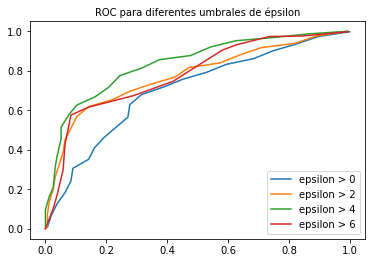

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(metricas0['TasaFP'],metricas0['TasaVP'])
plt.plot(metricas2['TasaFP'],metricas2['TasaVP'])
plt.plot(metricas4['TasaFP'],metricas4['TasaVP'])
plt.plot(metricas6['TasaFP'],metricas6['TasaVP'])
plt.legend(labels=["epsilon > 0","epsilon > 2","epsilon > 4","epsilon > 6"])
plt.title("ROC para diferentes umbrales de épsilon", fontsize = 10)

In [32]:
ordenarMayor(entrenados0,'Epsilon', 10)
ordenarMayor(entrenados0,'Score', 10)

,Variable,Valor,Nx,Ncx,P(C|X),Epsilon,Score
2184,G_psi_estrés_11nivel_COVID,A5,16.0,16.0,1.000000,2.558937,1.947460
1572,G_psi_autoeficacia_alimento_22,A29,12.0,12.0,1.000000,2.213962,1.675465
73,G_comer_cantidad_uni_concovid,A4,201.6,187.2,0.928600,6.900275,1.643500
98,G_condición_uni_concovid,A5,138.4,128.8,0.930758,5.773314,1.639293
1690,G_psi_autoeficacia_alimento_4,A29,11.2,11.2,1.000000,2.151819,1.626143
3440,G_psi_woop_plan_1,E,11.2,11.2,1.000000,2.140990,1.612865
3271,G_psi_retraso_gratif_6nivel,A6,28.0,26.4,0.941916,2.731788,1.552544
1933,G_psi_autoeficacia_ejercicio_6,A9,10.4,10.4,1.000000,2.066678,1.551821
802,G_ejercicios_h_uni_concovid,15.15,19.2,18.4,0.958509,2.409655,1.531428
1656,G_psi_autoeficacia_alimento_29,A31,9.6,9.6,1.000000,1.988203,1.476835


In [21]:
umbralE = 0

dataComer=data.loc[:, data.columns.str.contains('comer|alimento')]
clasificadosComer, entrenadosComer, metricasComer = fitValidacionCruzada(dataComer, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Comida')

dataRGratif=data.loc[:, data.columns.str.contains('gratif|G_comer_uni_concovid')]
clasificadosRetrasoGratif, entrenadosRetrasoGratif, metricasRetrasoGratif = fitValidacionCruzada(dataRGratif, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'rGratif')

dataEjer = data.loc[:, data.columns.str.contains('ejer|G_comer_uni_concovid')]
clasificadosEjer, entrenadosEjer, metricasEjer = fitValidacionCruzada(dataEjer, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Ejer')

dataAuto = data.loc[:, data.columns.str.contains('auto|G_comer_uni_concovid')]
clasificadosAuto, entrenadosAuto, metricasAuto = fitValidacionCruzada(dataAuto, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Autoef')

C:\Users\sofif\Documents\Proyecto Mineria\paqueteria\mineria_05_29.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Score'] = lista_prob


Text(0.5, 1.0, 'ROC diferentes grupos de variables epsilon > 0')

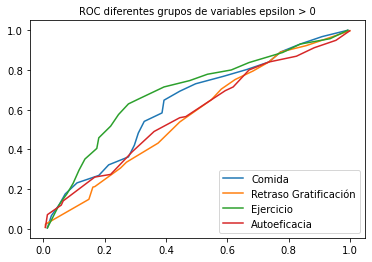

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(metricasComer['TasaFP'],metricasComer['TasaVP'])
plt.plot(metricasRetrasoGratif['TasaFP'],metricasRetrasoGratif['TasaVP'])
plt.plot(metricasEjer['TasaFP'],metricasEjer['TasaVP'])
plt.plot(metricasAuto['TasaFP'],metricasAuto['TasaVP'])

plt.legend(labels=["Comida","Retraso Gratificación","Ejercicio", "Autoeficacia"])
plt.title("ROC diferentes grupos de variables epsilon > " + str(umbralE), fontsize = 10)

In [23]:
umbralE = 3

dataComer=data.loc[:, data.columns.str.contains('comer|alimento')]
clasificadosComer, entrenadosComer, metricasComer = fitValidacionCruzada(dataComer, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Comida')

dataRGratif=data.loc[:, data.columns.str.contains('gratif|G_comer_uni_concovid')]
clasificadosRetrasoGratif, entrenadosRetrasoGratif, metricasRetrasoGratif = fitValidacionCruzada(dataRGratif, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'rGratif')

dataEjer = data.loc[:, data.columns.str.contains('ejer|G_comer_uni_concovid')]
clasificadosEjer, entrenadosEjer, metricasEjer = fitValidacionCruzada(dataEjer, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Ejer')

dataAuto = data.loc[:, data.columns.str.contains('auto|G_comer_uni_concovid')]
clasificadosAuto, entrenadosAuto, metricasAuto = fitValidacionCruzada(dataAuto, 'G_comer_uni_concovid', 'Y', 0.2, umbralE, 'Autoef')

C:\Users\sofif\Documents\Proyecto Mineria\paqueteria\mineria_05_29.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Score'] = lista_prob


Text(0.5, 1.0, 'ROC diferentes grupos de variables epsilon > 3')

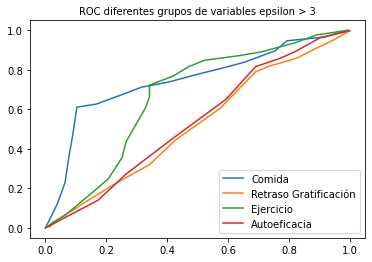

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(metricasComer['TasaFP'],metricasComer['TasaVP'])
plt.plot(metricasRetrasoGratif['TasaFP'],metricasRetrasoGratif['TasaVP'])
plt.plot(metricasEjer['TasaFP'],metricasEjer['TasaVP'])
plt.plot(metricasAuto['TasaFP'],metricasAuto['TasaVP'])

plt.legend(labels=["Comida","Retraso Gratificación","Ejercicio", "Autoeficacia"])
plt.title("ROC diferentes grupos de variables epsilon > " + str(umbralE), fontsize = 10)

In [28]:
ordenarMayor(entrenadosComer,'Epsilon', 10)

,Variable,Valor,Nx,Ncx,P(C|X),Epsilon,Score
3,G_comer_cantidad_uni_concovid,A4,201.6,187.2,0.928718,6.901677,1.637854
11,G_psi_locus_de_control_alimento_10,A3,20.0,8.0,0.398990,-3.037460,-1.250908
13,G_psi_locus_de_control_alimento_21,A3,49.0,25.0,0.510221,-3.056493,-0.840659
17,G_psi_locus_de_control_alimento_62,A4,13.0,4.0,0.307692,-3.143259,-1.556070
16,G_psi_locus_de_control_alimento_51,A2,17.0,6.0,0.352941,-3.156656,-1.390749
10,G_psi_autoeficacia_alimento_9,A22,15.0,5.0,0.333333,-3.186103,-1.480281
15,G_psi_locus_de_control_alimento_40,A2,19.0,7.0,0.368421,-3.189535,-1.337260
12,G_psi_locus_de_control_alimento_20,A2,17.0,6.0,0.354167,-3.219206,-1.415452
9,G_psi_autoeficacia_alimento_15,A22,7.0,1.0,0.142857,-3.284381,-2.126908
14,G_psi_locus_de_control_alimento_23,A3,45.0,22.0,0.488889,-3.353163,-0.950687


In [29]:
ordenarMayor(entrenadosComer,'Score', 10)

,Variable,Valor,Nx,Ncx,P(C|X),Epsilon,Score
3,G_comer_cantidad_uni_concovid,A4,201.6,187.2,0.928718,6.901677,1.637854
4,G_comer_cantidad_uni_concovid,A5,120.8,64.0,0.529626,-4.296868,-0.757453
2,G_comer_cantidad_uni_concovid,A3,74.0,38.0,0.513514,-3.669335,-0.821501
13,G_psi_locus_de_control_alimento_21,A3,49.0,25.0,0.510221,-3.056493,-0.840659
14,G_psi_locus_de_control_alimento_23,A3,45.0,22.0,0.488889,-3.353163,-0.950687
7,G_psi_alimento_TFEQ_14descontrolado,A4,32.0,14.0,0.437500,-3.358219,-1.110534
11,G_psi_locus_de_control_alimento_10,A3,20.0,8.0,0.398990,-3.037460,-1.250908
15,G_psi_locus_de_control_alimento_40,A2,19.0,7.0,0.368421,-3.189535,-1.337260
16,G_psi_locus_de_control_alimento_51,A2,17.0,6.0,0.352941,-3.156656,-1.390749
12,G_psi_locus_de_control_alimento_20,A2,17.0,6.0,0.354167,-3.219206,-1.415452


In [30]:
ordenarMayor(entrenadosEjer,'Epsilon', 10)

,Variable,Valor,Nx,Ncx,P(C|X),Epsilon,Score
8,G_ejercicios_h_uni_concovid,5.25,250.400000,207.200000,0.827504,4.173390,0.679178
1,G_ejercicios,A2,312.000000,249.600000,0.800057,3.592547,0.501824
4,G_ejercicios_edad,17.0,150.000000,123.000000,0.820328,3.178498,0.646916
15,G_psi_locus_de_control_ejercicio_18,A6,43.000000,40.000000,0.930233,3.130796,1.419150
20,G_psi_locus_de_control_ejercicio_6,A6,56.000000,50.000000,0.892857,3.080070,1.122992
6,G_ejercicios_h_preuni,6.833333,238.666667,190.666667,0.798919,3.054716,0.482704
19,G_psi_locus_de_control_ejercicio_35,A3,16.000000,6.000000,0.375000,-3.008212,-1.360113
12,G_psi_creencias_ejercicio_8,A4,18.000000,7.000000,0.388889,-3.060207,-1.313593
16,G_psi_locus_de_control_ejercicio_26,A2,4.000000,0.000000,0.000000,-3.110855,-2.483583
23,G_psi_woop_ejercicio_2,H,4.000000,0.000000,0.000000,-3.220696,-2.552046


In [31]:
ordenarMayor(entrenadosEjer,'Score', 10)

,Variable,Valor,Nx,Ncx,P(C|X),Epsilon,Score
15,G_psi_locus_de_control_ejercicio_18,A6,43.000000,40.000000,0.930233,3.130796,1.419150
20,G_psi_locus_de_control_ejercicio_6,A6,56.000000,50.000000,0.892857,3.080070,1.122992
8,G_ejercicios_h_uni_concovid,5.25,250.400000,207.200000,0.827504,4.173390,0.679178
4,G_ejercicios_edad,17.0,150.000000,123.000000,0.820328,3.178498,0.646916
1,G_ejercicios,A2,312.000000,249.600000,0.800057,3.592547,0.501824
6,G_ejercicios_h_preuni,6.833333,238.666667,190.666667,0.798919,3.054716,0.482704
5,G_ejercicios_h_preuni,-1,165.500000,95.250000,0.575473,-3.625233,-0.557123
7,G_ejercicios_h_uni_concovid,-1,152.800000,74.400000,0.487099,-5.994424,-0.925763
2,G_ejercicios,A3,101.600000,47.200000,0.464707,-5.383790,-1.013687
3,G_ejercicios_edad,-1,114.400000,52.800000,0.461565,-5.785906,-1.026406
